In [9]:
# %load simulations
from TreeClassifier import *
from TreeHardClassifier import *
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.svm import LinearSVC
from sklearn import svm
import numpy as np
import datetime
import os

In [10]:
def generate_data(n,d, adjust=True):
    X = np.random.normal(size=[n, d])
    row_squared_sums = np.reshape(np.sqrt(np.square(X).sum(axis=1)), (-1, 1))
    X = np.divide(X, row_squared_sums)
    dot1 = np.dot(X,np.ones((d,1)))
    dot2 = np.dot(X,np.concatenate([np.ones((d/2,1)), -1*np.ones((d/2,1))], axis=0))
    if adjust:
        med_dot1 = np.percentile(dot1,30,axis=0)[0]
        med_dot2 = np.percentile(dot2,30,axis=0)[0]
    else:
        med_dot1 = 0.0
        med_dot2 = 0.0
#     print med_dot1
#     print np.median(dot1)
#     print med_dot1.shape
    y = np.min([dot1-med_dot1, dot2-med_dot2],axis=0)
    y = np.greater(y,0.0).reshape(-1)
#     print y.sum()/float(len(y))
    return X,y

# generate_data(100,4)

In [11]:
n = 10000
d = 8

def manage_run(n,d):
    X,y = generate_data(n,d)
    maj = y.sum()/float(len(y))
    maj = np.max([maj,1-maj])
    print "majority"
    print maj
    
    svm_scores = cross_val_score(LinearSVC(fit_intercept=True), X, y, cv=5)
    print "svm"
    print svm_scores
    print svm_scores.mean()
    
    stochastic_scores = cross_val_score(TreeClassifier(normalizer_mode='no', number_of_iterations=10, print_debug=False, fit_full_tree=True), X, y, cv=5)
    print "stochasic"
    print stochastic_scores
    print stochastic_scores.mean()
        
    tree_scores = cross_val_score(tree.DecisionTreeClassifier(max_depth=10), X, y, cv=5)
    print "regular"
    print tree_scores
    print tree_scores.mean()
    
    return maj, svm_scores, stochastic_scores, tree_scores

In [12]:
n = 10000
d_range = [(1+i)*2 for i in range(15)]

maj = {}
svm_scores_means = {}
stochastic_scores_means = {}
tree_scores_means = {}

for d in d_range:
    print d
    maj[d], svm_scores_means[d], stochastic_scores_means[d], tree_scores_means[d] = manage_run(n,d)
    print ''

2
majority
0.5489
svm
[ 0.99850075  0.9995      0.9985      0.998       0.9969985 ]
0.998299849775
just bias
just bias
just bias
just bias
just bias
stochasic
[ 0.9970015  0.996      0.9965     0.9955     0.9949975]
0.9959997996
regular
[ 1.  1.  1.  1.  1.]
1.0

4
majority
0.5157
svm
[ 0.84957521  0.85257371  0.858       0.85692846  0.86393197]
0.85620187115
just bias
just bias
just bias
just bias
just bias
stochasic
[ 0.85257371  0.85407296  0.8605      0.85592796  0.86493247]
0.857601421375
regular
[ 0.93753123  0.93153423  0.947       0.93346673  0.93596798]
0.937100036925

6
majority
0.5141
svm
[ 0.84507746  0.8355      0.855       0.831       0.83941971]
0.841199434225
just bias
just bias
just bias
just bias
just bias
stochasic
[ 0.84507746  0.8355      0.854       0.836       0.84292146]
0.8426997844
regular
[ 0.84407796  0.8455      0.846       0.835       0.85842921]
0.845801435125

8
majority
0.5127
svm
[ 0.83208396  0.83008496  0.8415      0.84392196  0.82991496]
0.835501166

In [13]:
%matplotlib inline

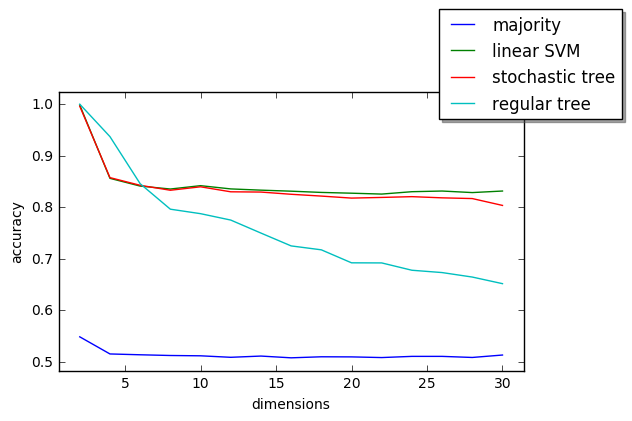

In [17]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.plot(d_range,[maj[m].mean() for m in d_range], label = 'majority')
ax.plot(d_range,[svm_scores_means[m].mean() for m in d_range], label = 'linear SVM')
ax.plot(d_range,[stochastic_scores_means[m].mean() for m in d_range], label = 'stochastic tree')
ax.plot(d_range,[tree_scores_means[m].mean() for m in d_range], label = 'regular tree')

ax.margins(0.05) # 5% padding in all directions
# legend = ax.legend(lbbox_to_anchor=(1.1, 1.05), shadow=True)

ax.set_xlabel('dimensions')
ax.set_ylabel('accuracy')

# Shrink current axis's height by 10% on the bottom
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])

# Put a legend below current axis
# ax.legend(loc='upper center', bbox_to_anchor=(0.8, 0.87),
#           fancybox=False, shadow=True, ncol=1)
ax.legend(loc='lower left', bbox_to_anchor=(0.8, 0.87),
           fancybox=False, shadow=True, ncol=1)

plt.show()
fig.savefig(r'c:\temp\multi-dim-xor-simulation.pdf')

In [15]:
# tree_scores = cross_val_score(tree.DecisionTreeClassifier(max_depth=3), X, y, cv=5)
# print "regular"
# print tree_scores.mean()

In [16]:
# gaus_scores = cross_val_score(svm.SVC(kernel='rbf', gamma=2), X, y, cv=5)
# print "gauss"
# print gaus_scores.mean()